In [294]:
!pip install ucimlrepo

In [295]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# Combining the two datasets into one DataFrame
X['income']=y
df=X
# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

***Impoert Libraries***

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [297]:
#Let's visulize first 5 rows to get and idea about the dataset structure
df.head().T


,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


In [298]:
len(df)

48842

In [299]:
# Check whether this dataset contains any null values or not
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [300]:
#Now let's look into the value counts of categorical and ordinal variables in the dataset to analyze unique values in each feature

In [301]:
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [302]:
df["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [303]:
df["education-num"].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education-num, dtype: int64

In [304]:
df["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [305]:
df["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [306]:
df["relationship"].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [307]:
df["race"].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [308]:
df["sex"].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [309]:
df["fnlwgt"].value_counts()

203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: fnlwgt, Length: 28523, dtype: int64

In [310]:
df["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [311]:
df["income"].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [312]:
#Most of the features has unique value called "?". Let's check the count of '?' in each columns.
#Replace ? with NaN.
df.replace('?', np.NaN,inplace = True)
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [313]:
#After replacing the output is like this.
df.isin(['?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [314]:
len(df)

48842

***Handle null values***

In [315]:
#Looks like workclass,occupation and native-country has null values.
#Let's handle them.

In [316]:
#Fill the null values using mode
country_mode_value = df['native-country'].mode()[0]

# Replace NaN values in 'native-country' with the mode
df['native-country'].fillna(value=country_mode_value, inplace=True)

In [317]:
workclass_mode_value = df['workclass'].mode()[0]

# Replace NaN values in 'native-country' with the mode
df['workclass'].fillna(value=workclass_mode_value, inplace=True)

In [318]:
occupation_mode_value = df['occupation'].mode()[0]

# Replace NaN values in 'native-country' with the mode
df['occupation'].fillna(value=occupation_mode_value, inplace=True)

In [319]:
#In target variable there are 4 unique values because of the dot. Let's remove it and make 2 unique variables
df["income"] = df["income"].str.strip('.')

In [320]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [321]:
print(df["income"].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [322]:
#Let's see the number of rows and columns
df.shape

(48842, 15)

***Let's analyze***

In [323]:
#It is impossible to have a occupation when the person has never worked before. So best way to handle this is remove these rows. As there are only 10 rows.

In [324]:
never_worked_df = df[df['workclass'] == 'Never-worked']

# Display the occupation of those who have never worked
print(never_worked_df['occupation'])

5361     Prof-specialty
10845    Prof-specialty
14772    Prof-specialty
20337    Prof-specialty
23232    Prof-specialty
32304    Prof-specialty
32314    Prof-specialty
41346    Prof-specialty
44168    Prof-specialty
46459    Prof-specialty
Name: occupation, dtype: object


In [325]:
#Remove rows
df = df[df['workclass'] != 'Never-worked']

In [326]:
df["workclass"].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Name: workclass, dtype: int64

In [327]:
df["occupation"].value_counts()

Prof-specialty       8971
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [328]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17507,22,Private,267945,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,16,United-States,<=50K
33270,62,Self-emp-inc,153891,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,3137,0,40,United-States,<=50K
42166,33,State-gov,30494,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
32703,40,Private,155972,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,55,United-States,>50K
35906,44,Private,160919,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,30,United-States,<=50K
8900,24,Private,172612,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
4971,46,State-gov,29696,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
20576,68,Private,351402,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,70,United-States,<=50K
29524,43,Private,184018,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
2634,66,Private,112871,11th,7,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [329]:
#Let's get an overview idea of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48832 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48832 non-null  int64 
 1   workclass       48832 non-null  object
 2   fnlwgt          48832 non-null  int64 
 3   education       48832 non-null  object
 4   education-num   48832 non-null  int64 
 5   marital-status  48832 non-null  object
 6   occupation      48832 non-null  object
 7   relationship    48832 non-null  object
 8   race            48832 non-null  object
 9   sex             48832 non-null  object
 10  capital-gain    48832 non-null  int64 
 11  capital-loss    48832 non-null  int64 
 12  hours-per-week  48832 non-null  int64 
 13  native-country  48832 non-null  object
 14  income          48832 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [330]:
#Remove duplicate rows
df = df.drop_duplicates()

In [331]:
len(df)

48779

In [332]:
# Replace income <=50K as 0 and 1
df["income"] = df["income"].replace({'<=50K': 0, '>50K': 1})

***Data Visualization***

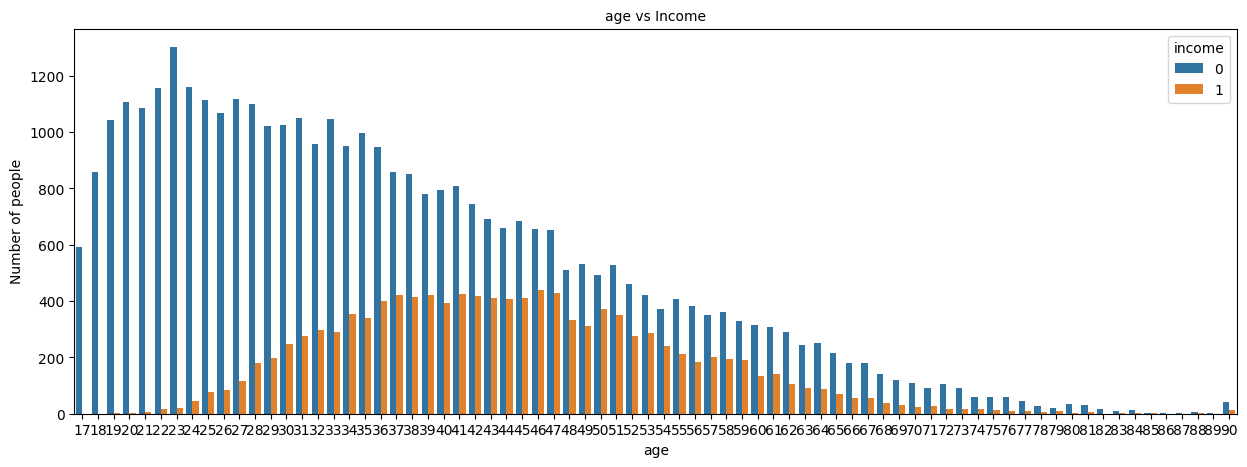

In [333]:
# Plot the bar chart for age and number of income
fig, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=df,x='age',hue='income')
plt.title('age vs Income',fontsize=10)
plt.xlabel('age',fontsize=10)
plt.ylabel('Number of people',fontsize=10)
plt.show()

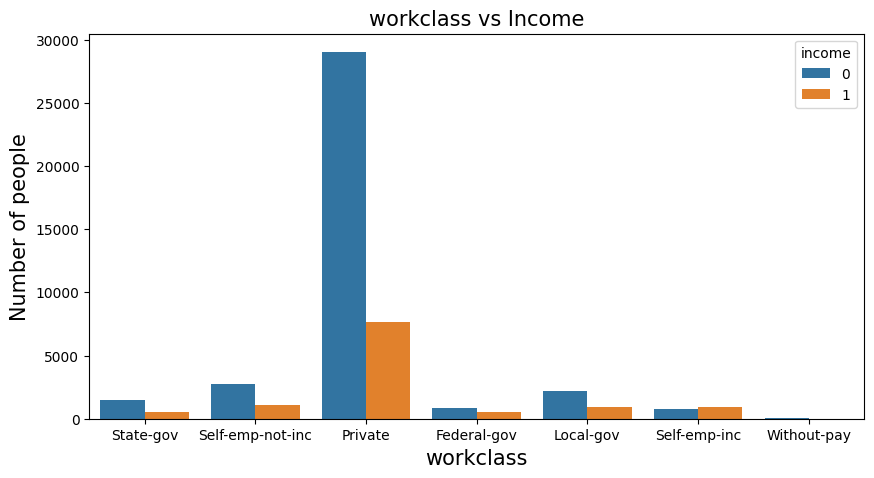

In [334]:
# Plot the bar chart for workclass and number of income
fig, axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(data=df,x='workclass',hue='income')
plt.title('workclass vs Income',fontsize=15)
plt.xlabel('workclass',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

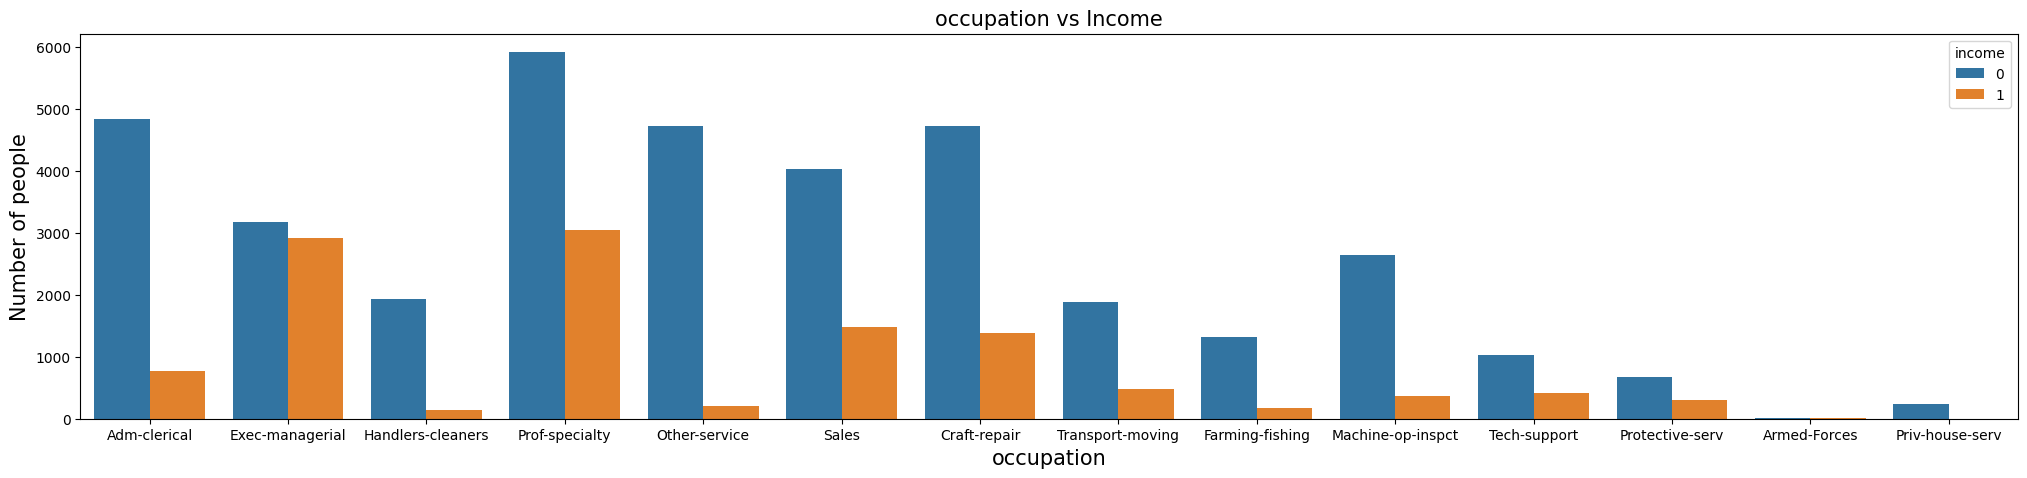

In [335]:
# Plot the bar chart for occupation and number of income
fig, axes = plt.subplots(1,1,figsize=(25,5))
sns.countplot(data=df,x='occupation',hue='income')
plt.title('occupation vs Income',fontsize=15)
plt.xlabel('occupation',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

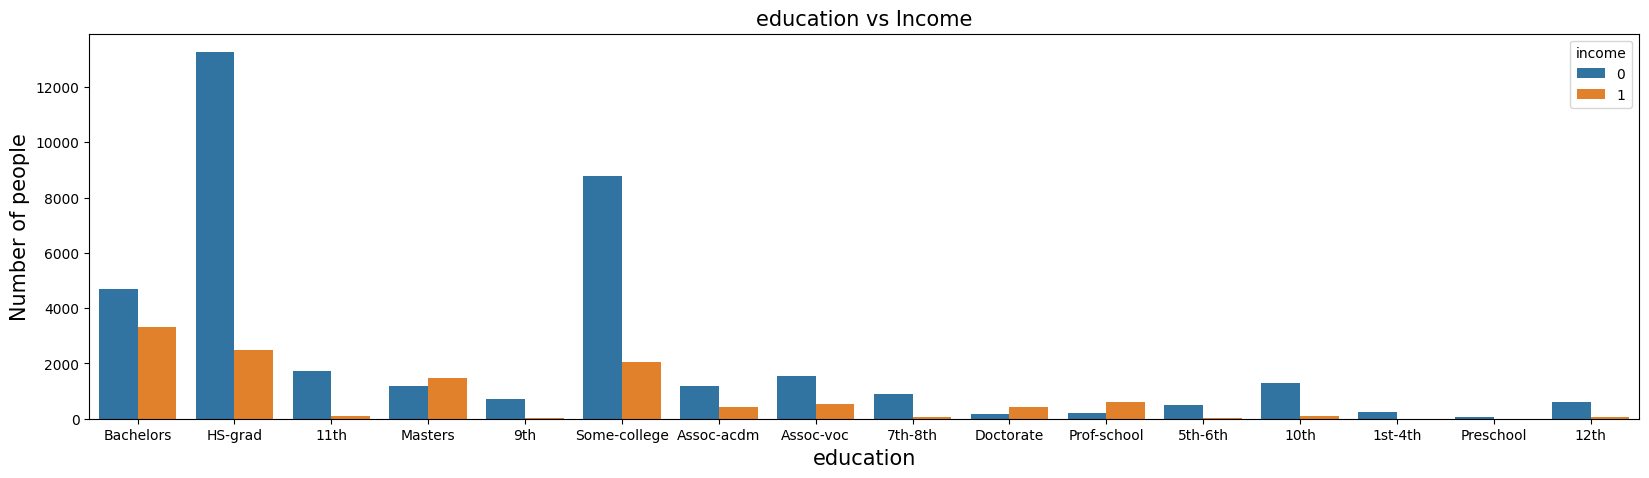

In [336]:
# Plot the bar chart for education and number of income
fig, axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(data=df,x='education',hue='income')
plt.title('education vs Income',fontsize=15)
plt.xlabel('education',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

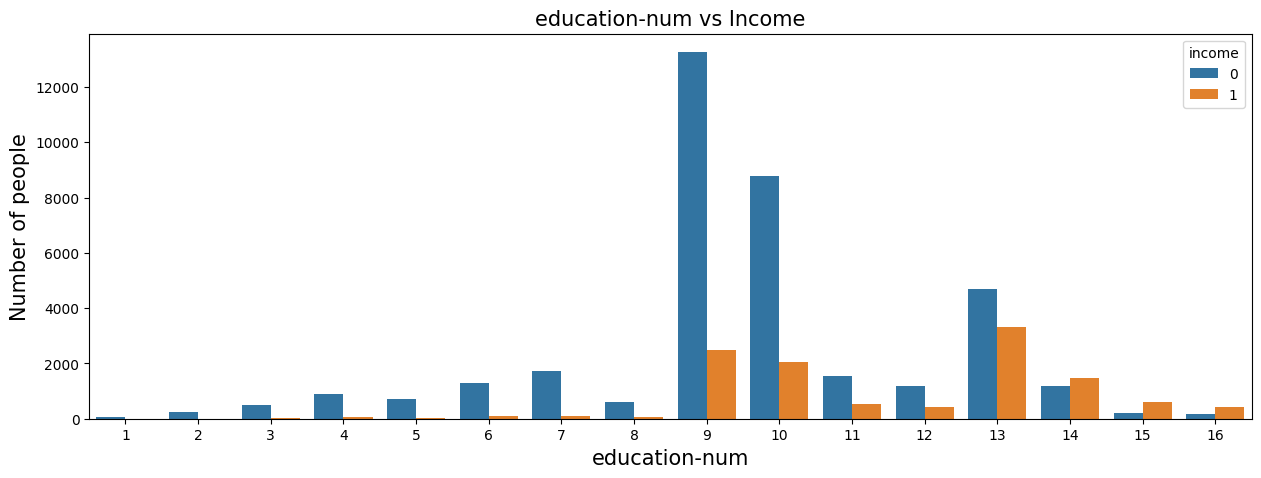

In [337]:
# Plot the bar chart for education-num and number of income
fig, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=df,x='education-num',hue='income')
plt.title('education-num vs Income',fontsize=15)
plt.xlabel('education-num',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

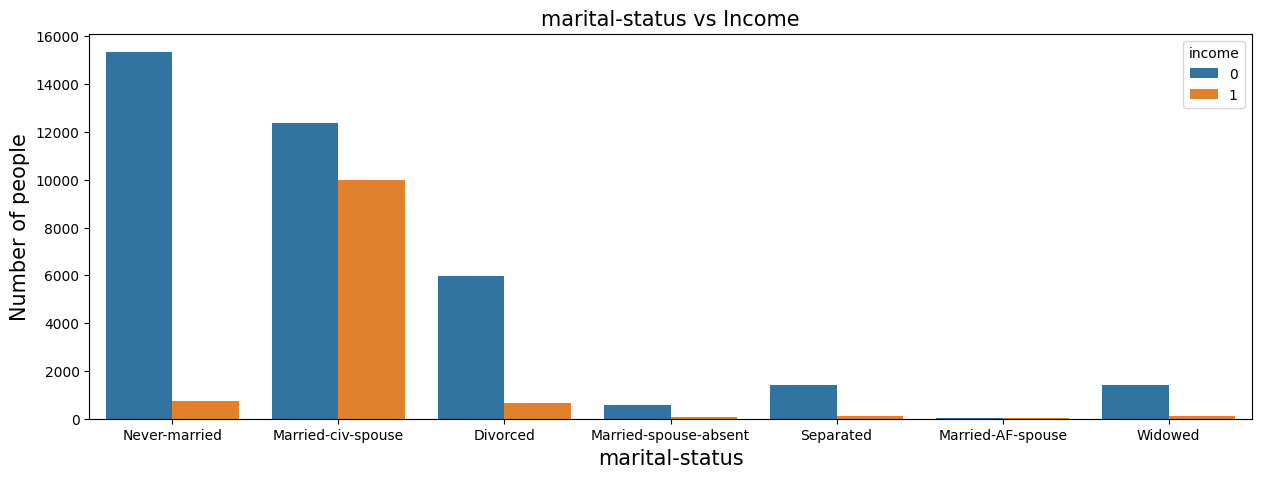

In [338]:
# Plot the bar chart for marital-status and number of income
fig, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=df,x='marital-status',hue='income')
plt.title('marital-status vs Income',fontsize=15)
plt.xlabel('marital-status',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

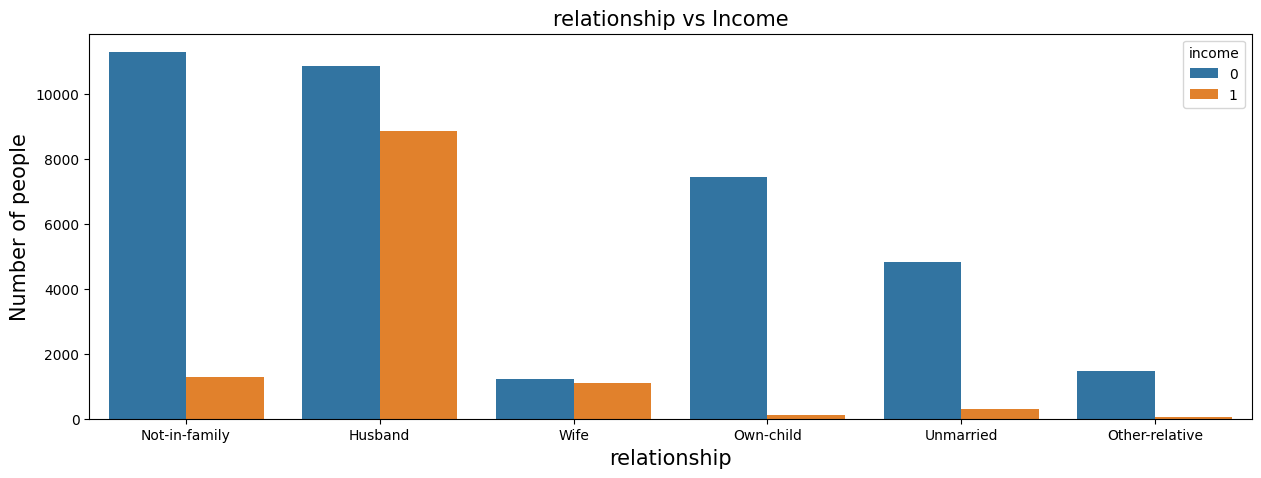

In [339]:
# Plot the bar chart for relationship and number of income
fig, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=df,x='relationship',hue='income')
plt.title('relationship vs Income',fontsize=15)
plt.xlabel('relationship',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

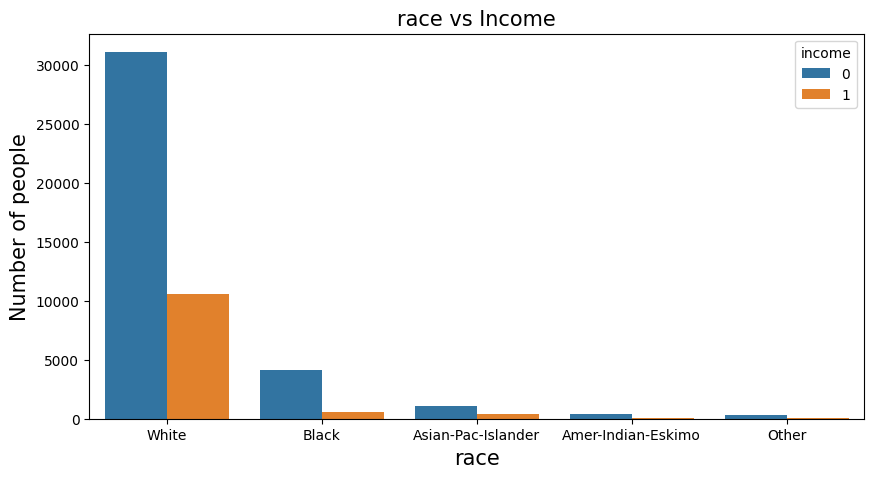

In [340]:
# Plot the bar chart for race and number of income
fig, axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(data=df,x='race',hue='income')
plt.title('race vs Income',fontsize=15)
plt.xlabel('race',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

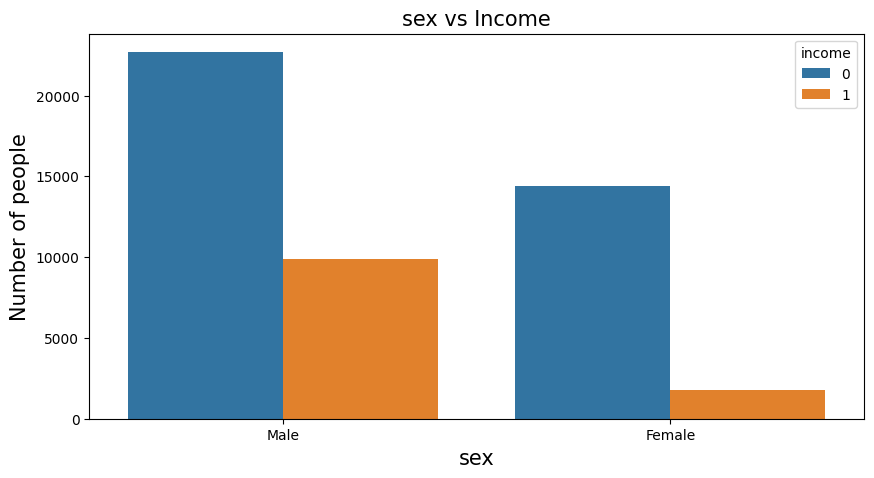

In [341]:
# Plot the bar chart for sex and number of income
fig, axes = plt.subplots(1,1,figsize=(10,5))
sns.countplot(data=df,x='sex',hue='income')
plt.title('sex vs Income',fontsize=15)
plt.xlabel('sex',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

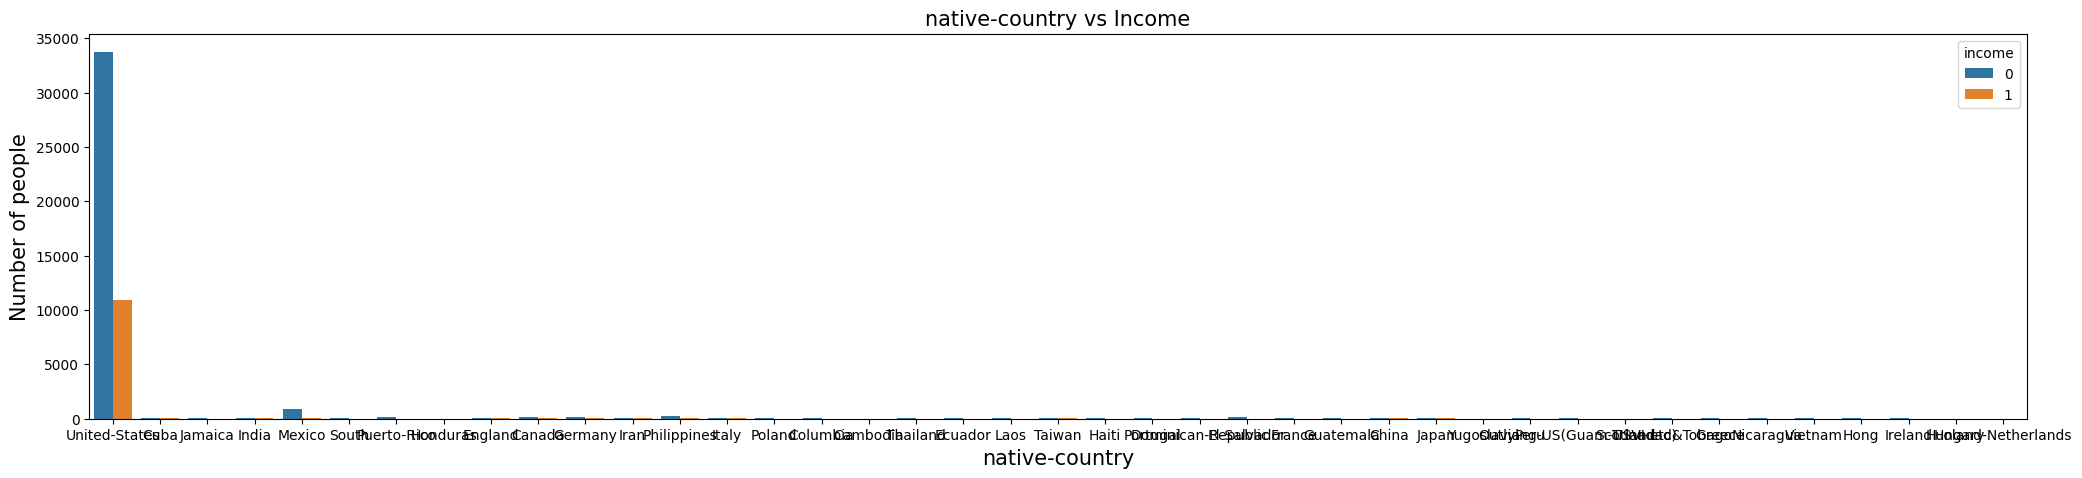

In [342]:
# Plot the bar chart for native-country and number of income
fig, axes = plt.subplots(1,1,figsize=(25,5))
sns.countplot(data=df,x='native-country',hue='income')
plt.title('native-country vs Income',fontsize=15)
plt.xlabel('native-country',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

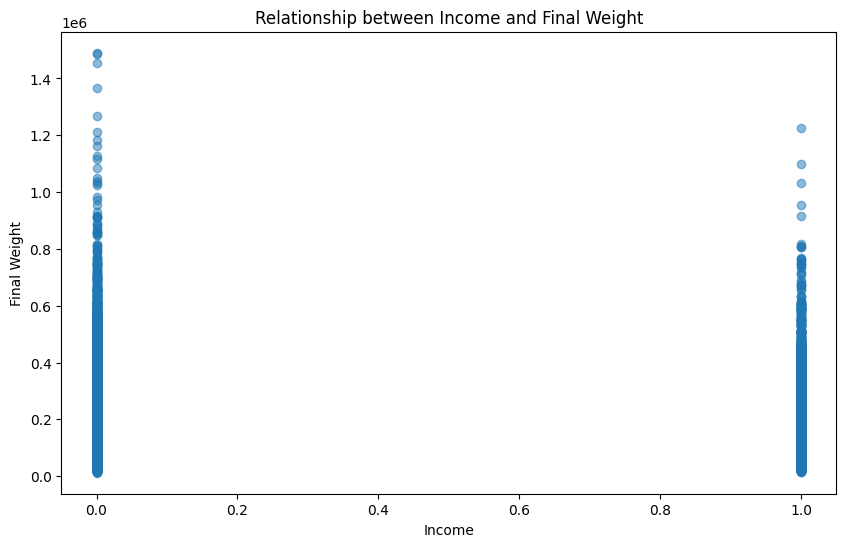

In [343]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.scatter(df['income'], df['fnlwgt'], alpha=0.5)  # alpha is for marker opacity

plt.title('Relationship between Income and Final Weight')
plt.xlabel('Income')
plt.ylabel('Final Weight')

plt.show()

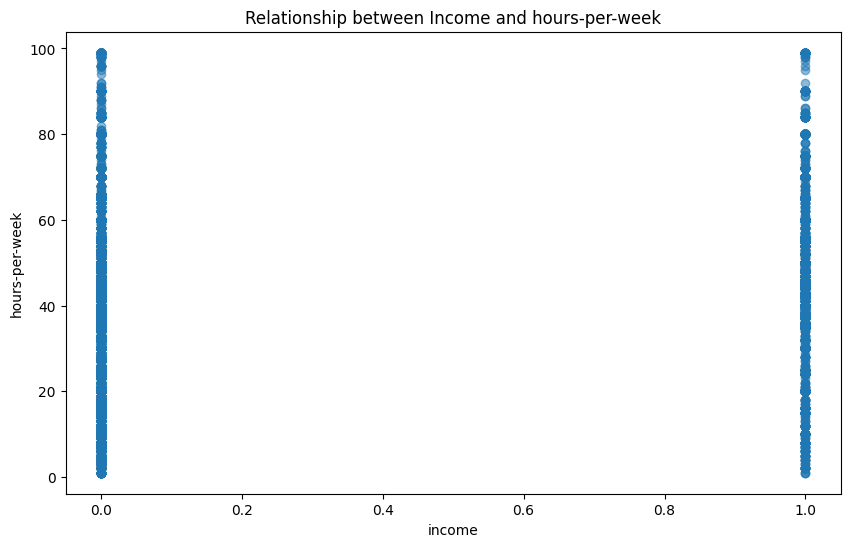

In [344]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.scatter(df['income'], df['hours-per-week'], alpha=0.5)  # alpha is for marker opacity

plt.title('Relationship between Income and hours-per-week')
plt.xlabel('income')
plt.ylabel('hours-per-week')

plt.show()

***Handle Outliers***

In [345]:
import seaborn as sns

<Axes: ylabel='age'>

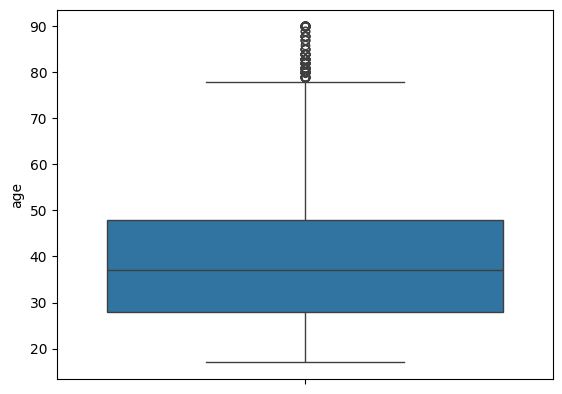

In [346]:
# Box Plot
sns.boxplot(df['age'])

In [347]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the criteria for outliers
outliers = ((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))

# Count the number of outliers
number_of_outliers = outliers.sum()

print("Number of outliers:", number_of_outliers)

Number of outliers: 215


In [348]:
# Remove outliers
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

<Axes: ylabel='age'>

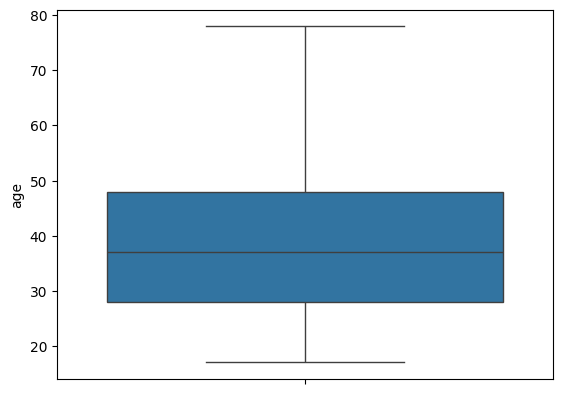

In [349]:
sns.boxplot(df['age'])

<Axes: ylabel='fnlwgt'>

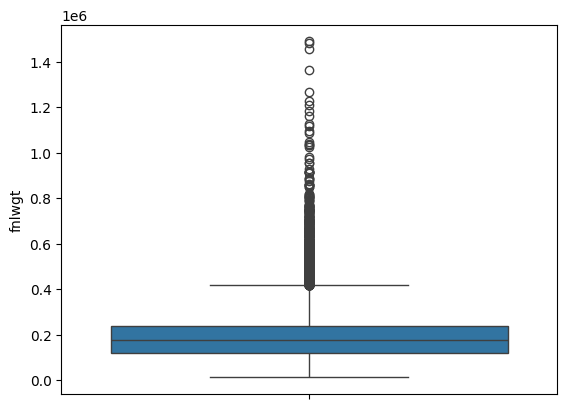

In [350]:
# Box Plot
sns.boxplot(df['fnlwgt'])

In [351]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the criteria for outliers
outliers = ((df['fnlwgt'] < (Q1 - 1.5 * IQR)) | (df['fnlwgt'] > (Q3 + 1.5 * IQR)))

# Count the number of outliers
number_of_outliers = outliers.sum()

print("Number of outliers:", number_of_outliers)

Number of outliers: 1451


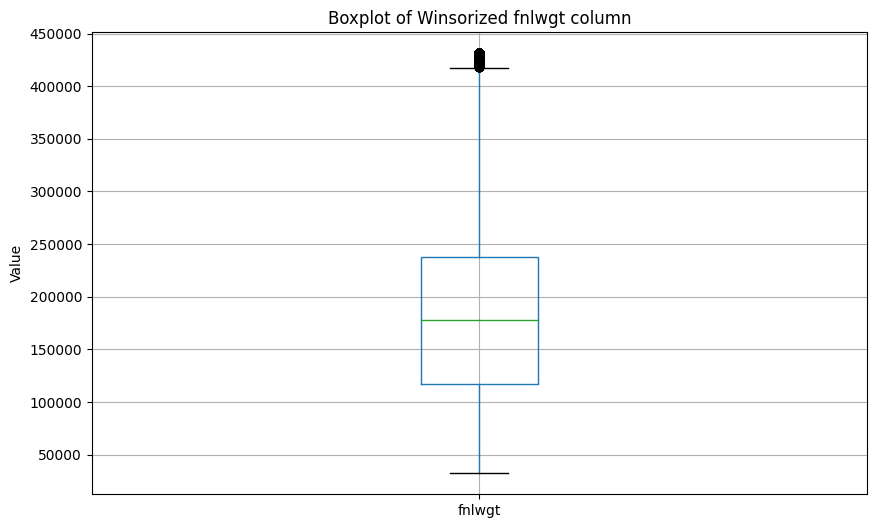

In [352]:
# Winsorization of 'fnlwgt' column
df['fnlwgt'] = winsorize(df['fnlwgt'], limits=[0.025, 0.025])
plt.figure(figsize=(10, 6))
pd.DataFrame(df['fnlwgt']).boxplot()
plt.title('Boxplot of Winsorized fnlwgt column')
plt.ylabel('Value')
plt.show()

***Feature Engineering***

In [353]:
# Creating a net capital feature
df['Net_Capital'] = df['capital-gain'] - df['capital-loss']

In [354]:
# Dropping the 'Capital Gain' and 'Capital Loss' columns
df = df.drop(['capital-gain', 'capital-loss'], axis=1)

In [355]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,Net_Capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,0,0
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,40,United-States,0,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,0,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,0,5455


***Categorical Column Analysis***

**Label Encoding**

In [356]:
#Let's encode the categorical data
le=LabelEncoder()
encoding_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in encoding_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,Net_Capital
0,39,5,77516,9,13,4,0,1,4,1,40,38,0,2174
1,50,4,83311,9,13,2,3,0,4,1,13,38,0,0
2,38,2,215646,11,9,0,5,1,4,1,40,38,0,0
3,53,2,234721,1,7,2,5,0,2,1,40,38,0,0
4,28,2,338409,9,13,2,9,5,2,0,40,4,0,0


In [357]:
income_column=df["income"]
df["income_"]= df["income"]
df = df.drop('income', axis=1)

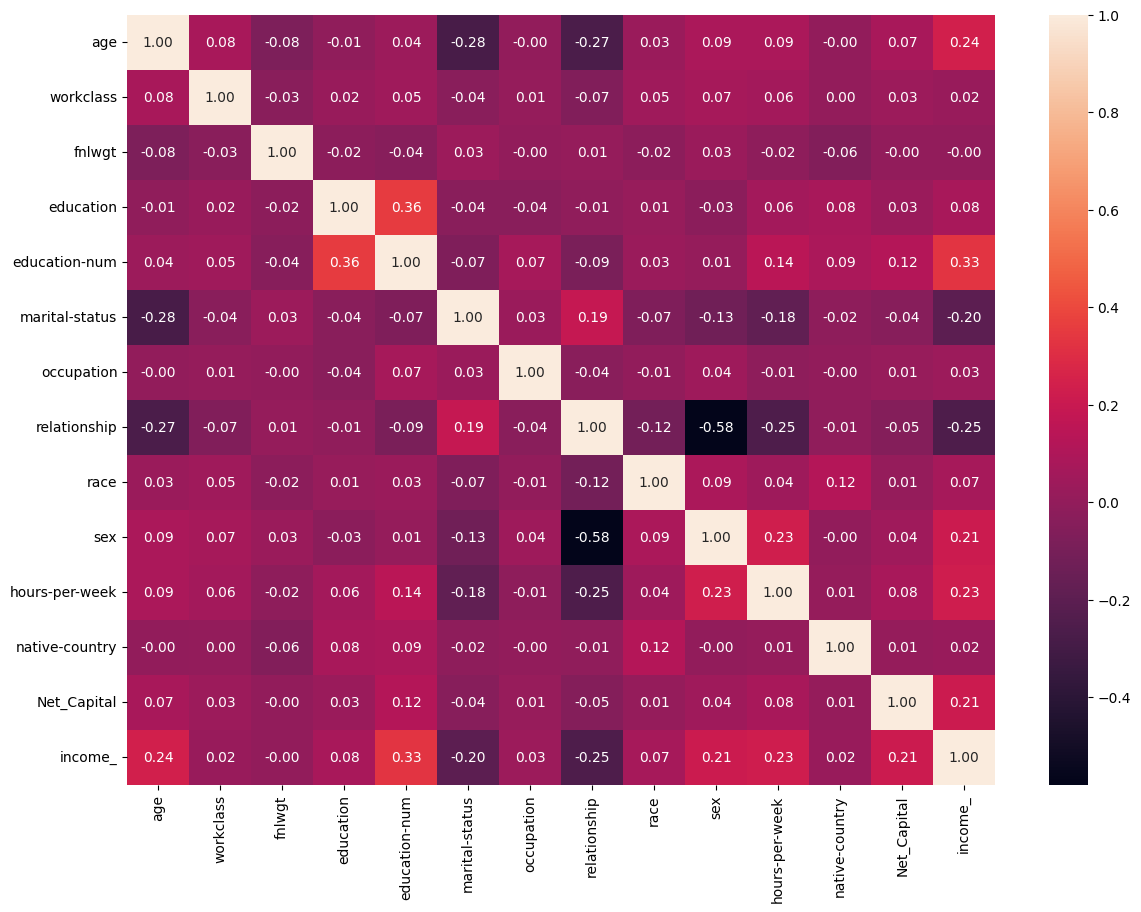

In [358]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [359]:
df.shape

(48564, 14)

In [360]:
#As fnlwgt has low correlation with income. So it won't affect for the prections about income. let's drop it.
df = df.drop(['fnlwgt'], axis=1)

0    0.760255
1    0.239745
Name: income_, dtype: float64


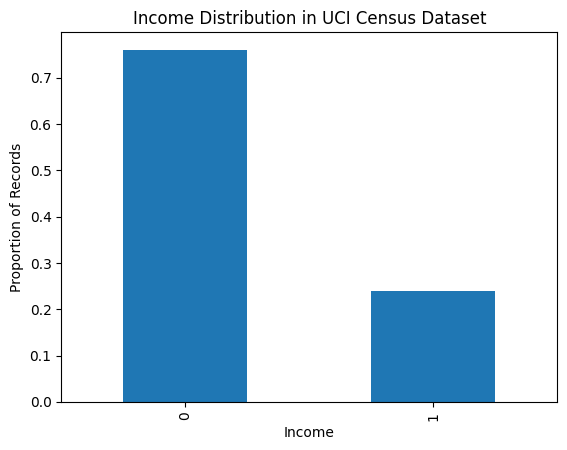

In [361]:
# Inspect the 'income' column to understand its imbalance
income_distribution = df['income_'].value_counts(normalize=True)
print(income_distribution)


income_distribution.plot(kind='bar')
plt.title('Income Distribution in UCI Census Dataset')
plt.xlabel('Income')
plt.ylabel('Proportion of Records')
plt.show()

In [362]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,Net_Capital,income_
0,39,5,9,13,4,0,1,4,1,40,38,2174,0
1,50,4,9,13,2,3,0,4,1,13,38,0,0
2,38,2,11,9,0,5,1,4,1,40,38,0,0
3,53,2,1,7,2,5,0,2,1,40,38,0,0
4,28,2,9,13,2,9,5,2,0,40,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,2,9,13,0,9,1,4,0,36,38,0,0
48838,64,2,11,9,6,9,2,2,1,40,38,0,0
48839,38,2,9,13,2,9,0,4,1,50,38,0,0
48840,44,2,9,13,0,0,3,1,1,40,38,5455,0


In [363]:
df.shape
y=df['income_']
X=df.drop(['income_'], axis=1)


In [364]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Assuming `X` is your feature matrix and `y` is the target vector
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

# Then, you can train your model on the resampled training set
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Evaluate the model
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7322
           1       0.65      0.71      0.68      2391

    accuracy                           0.84      9713
   macro avg       0.78      0.79      0.78      9713
weighted avg       0.84      0.84      0.84      9713



In [365]:
model.score(x_train,y_train)

0.972684888002973

In [366]:
y.shape
X.shape

(48564, 12)

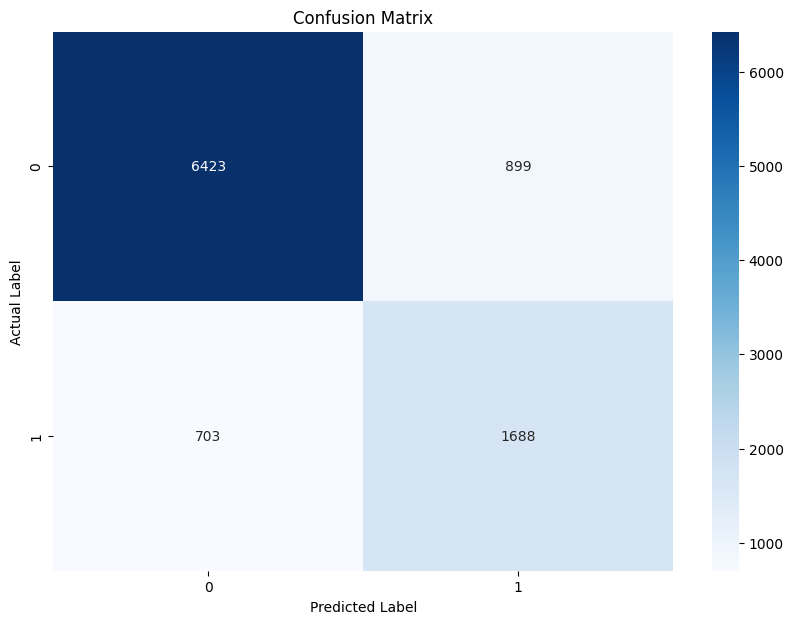

In [367]:
from sklearn.metrics import confusion_matrix

# Generate predictions
predictions = model.predict(x_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)


# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



In [368]:
from sklearn.preprocessing import PowerTransformer
# Creating a Gaussian Classifier
model = GaussianNB()
pt=PowerTransformer()
x_trans=pt.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size = 0.2, random_state = 42)

# Train the model using the training sets
gnb = model.fit(x_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(x_test)

# Evaluate Naive Bayes Classifier
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naive Bayes Classifier:
Accuracy: 0.8023267785442191
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      7322
           1       0.58      0.69      0.63      2391

    accuracy                           0.80      9713
   macro avg       0.74      0.77      0.75      9713
weighted avg       0.82      0.80      0.81      9713



In [369]:
model.score(x_test,y_test)

0.8023267785442191

In [370]:
model.score(x_train,y_train)

0.7986924403490258

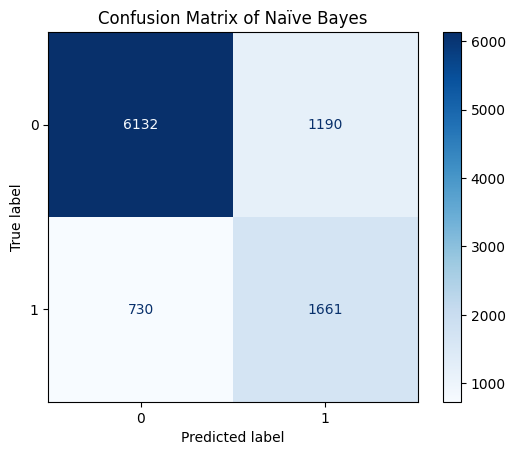

In [371]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Naïve Bayes")
plt.show()

In [372]:
model.score(x_train, y_train)

0.7986924403490258

In [373]:
model.score(x_test, y_test)

0.8023267785442191

In [374]:
x_trainR, x_testR, y_trainR, y_testR = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [375]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [80, 90],
    'max_depth': [None, 8, 10],
    'min_samples_split': [11, 12],
    'min_samples_leaf': [9, 10]
}

# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(x_trainR, y_trainR)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(x_testR)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 9, 'min_samples_split': 11, 'n_estimators': 90}
Best Score: 0.8619340456310575


In [376]:
# Evaluate Random Forest Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.8618346545866364
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7322
           1       0.79      0.60      0.68      2391

    accuracy                           0.86      9713
   macro avg       0.83      0.77      0.80      9713
weighted avg       0.86      0.86      0.86      9713



In [377]:
grid_search.score(x_trainR, y_trainR)

0.8767341895961493

In [378]:
grid_search.score(x_testR, y_test)

0.8618346545866364

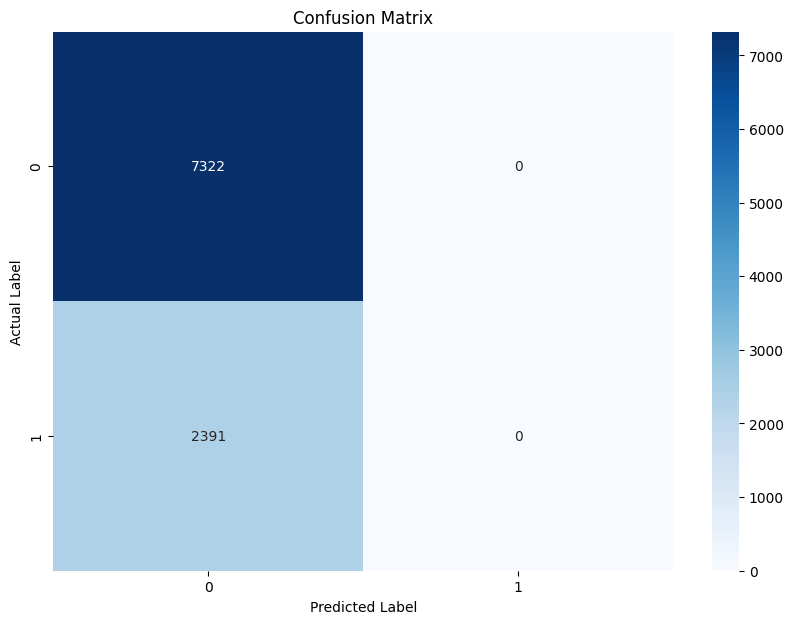

In [379]:
from sklearn.metrics import confusion_matrix

# Generate predictions
predictions = grid_search.best_estimator_.predict(x_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)


# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



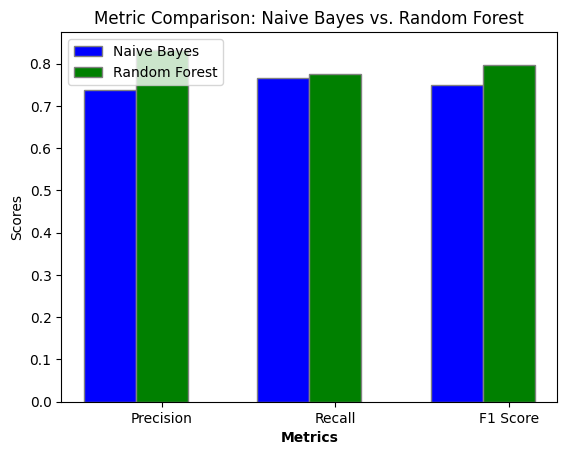

In [380]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assume y_test is the correct labels for both models
# Naive Bayes Evaluation Metrics
nb_precision, nb_recall, nb_f1, _ = precision_recall_fscore_support(y_test, gnb_predictions, average='macro')

# Random Forest Evaluation Metrics
# Assuming y_pred is the prediction from Random Forest
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Metrics for plotting
metrics = ['Precision', 'Recall', 'F1 Score']
naive_bayes_scores = [nb_precision, nb_recall, nb_f1]
random_forest_scores = [rf_precision, rf_recall, rf_f1]

# Set up the bar width
barWidth = 0.3

# Set position of bar on X axis
r1 = range(len(metrics))
r2 = [x + barWidth for x in r1]

# Creating the bar plot
plt.bar(r1, naive_bayes_scores, color='blue', width=barWidth, edgecolor='grey', label='Naive Bayes')
plt.bar(r2, random_forest_scores, color='green', width=barWidth, edgecolor='grey', label='Random Forest')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(metrics))], metrics)

# Create legend & Show graphic
plt.ylabel('Scores')
plt.title('Metric Comparison: Naive Bayes vs. Random Forest')
plt.legend()
plt.show()
